In [1]:
%pip install scikit-learn numpy matplotlib

In [1]:
import pandas as pd

data = pd.read_csv("preprocessed_data.csv")
data.drop(columns=['Timestamp'], inplace=True)
data

,Amount,Merchant,TransactionType,Location,Target,Hour,DayOfWeek,Month,DayOfMonth
0,1.545884,7,0,4,0,8,6,1,1
1,-1.185041,7,0,0,0,8,6,1,1
2,0.515582,4,2,0,0,8,6,1,1
3,-1.718415,4,0,0,0,8,6,1,1
4,-1.696809,8,0,1,0,8,6,1,1
...,...,...,...,...,...,...,...,...,...
216955,0.427759,0,2,3,0,23,2,5,31
216956,0.637149,6,1,0,0,23,2,5,31
216957,-1.439504,5,0,0,0,23,2,5,31
216958,0.952316,5,0,2,0,23,2,5,31


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Target'])
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [3]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65085
           1       1.00      1.00      1.00         3

    accuracy                           1.00     65088
   macro avg       1.00      1.00      1.00     65088
weighted avg       1.00      1.00      1.00     65088



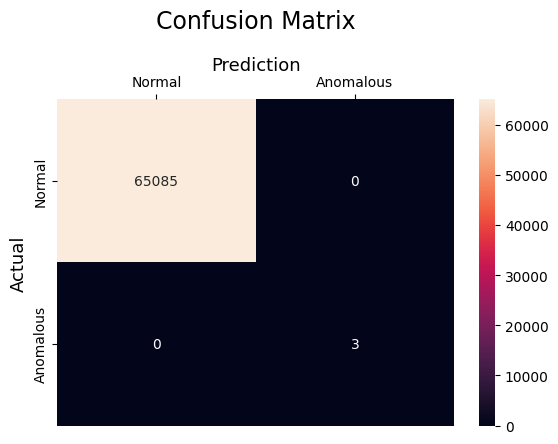

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix, annot=True, fmt='g', xticklabels=['Normal', 'Anomalous'], yticklabels=['Normal', 'Anomalous'])
plt.ylabel('Actual', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20)
plt.gca().xaxis.set_label_position('top')
plt.xlabel('Prediction', fontsize=13)
plt.gca().xaxis.tick_top()

plt.gca().figure.subplots_adjust(bottom=0.2)
plt.show()

In [6]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Optionally, include features from the test set for more context
results_with_features = X_test.copy()
results_with_features['Actual'] = y_test.values
results_with_features['Predicted'] = y_pred

# Display the first few rows
results_with_features.head()

,Amount,Merchant,TransactionType,Location,Hour,DayOfWeek,Month,DayOfMonth,Actual,Predicted
197081,-0.660789,8,2,4,4,3,5,18,0,0
185,-1.658858,3,0,4,11,6,1,1,0,0
207759,1.569148,1,1,3,14,3,5,25,0,0
139681,-1.237234,9,2,4,8,5,4,8,0,0
127825,-0.301504,0,1,3,2,4,3,31,0,0


In [7]:
minority_class_predictions = results_with_features[results_with_features['Actual'] == 1]

minority_class_predictions

,Amount,Merchant,TransactionType,Location,Hour,DayOfWeek,Month,DayOfMonth,Actual,Predicted
45100,28.280959,8,2,1,15,2,2,1,1,1
2775,31.921692,9,1,2,6,1,1,3,1,1
4148,4.716995,3,0,3,5,2,1,4,1,1


In [8]:
anomalous_data = pd.DataFrame({
    'Amount': [23.1221, 56.4752],
    'Merchant': [0, 8],
    'TransactionType': [2, 1],
    'Location': [5, 6],
    'Hour': [3, 23],
    'DayOfWeek': [6, 0],
    'Month': [12, 1],
    'DayOfMonth': [25, 1]
})

anomalous_preds = model.predict(anomalous_data)

anomalous_data['Predicted'] = anomalous_preds

anomalous_data

,Amount,Merchant,TransactionType,Location,Hour,DayOfWeek,Month,DayOfMonth,Predicted
0,23.1221,0,2,5,3,6,12,25,1
1,56.4752,8,1,6,23,0,1,1,1


In [9]:
normal_data = pd.DataFrame({
    'Amount': [1.523, 0.52313],
    'Merchant': [7, 6],
    'TransactionType': [1, 2],
    'Location': [2, 2], 
    'Hour': [13, 13],
    'DayOfWeek': [1, 3],
    'Month': [3, 3],
    'DayOfMonth': [12, 1]
})

normal_preds = model.predict(normal_data)

normal_data['Predicted'] = normal_preds

normal_data

,Amount,Merchant,TransactionType,Location,Hour,DayOfWeek,Month,DayOfMonth,Predicted
0,1.52300,7,1,2,13,1,3,12,0
1,0.52313,6,2,2,13,3,3,1,0
